# Assignment Code: DS-AG-022
# Image Classification using CNN Architectures | Assignment

**Q1.** What is a Convolutional Neural Network (CNN), and how does it differ from traditional fully connected neural networks in terms of architecture and image data?

- **Ans:** A Convolutional Neural Network (CNN) is a deep learning model designed to process data with a grid-like structure, such as images. It uses convolutional layers that apply learnable filters to capture local spatial features (e.g., edges, textures), preserving the spatial relationships within the data.

- **Difference from fully connected networks:**
  - CNNs use local connectivity and weight sharing, whereas fully connected networks connect every neuron to all previous neurons.
  - CNNs accept images in their 2D/3D form, while fully connected networks require flattened inputs, losing spatial structure.
  - CNNS have significantly fewer parameters and better capture hierarchical patterns in images.


**Q2.** Discuss the architecture of LeNet-5 and explain how it laid the foundation for modern deep learning models in computer vision. Include references to its original reasearch paper.

- **Ans:** LeNet-5, introduced by *LeCun et al. (1998)* in *"Gradient-Based Learning Applied to Document Recognition,"* is a seven-layer convolutional neural network designed for handwritten digit recognition.

- **Architecture:** LeNet-5 consists of an input layer followed by two convolution-subsampling pairs (C1-S2, C3-S4), a third convolutional layer (C5), a fully connected layer (F6), and a 10-class output layer. It uses (5 x 5) kernels, average pooling, and progressively increasing feature maps (6 → 16 → 120), ending with fully connected classification layers.

- **Significance:** LeNet-5 established the core principles of modern CNNs-local receptive fields, weight sharing, hierarchical feature extraction, and end-to-end training with backpropagation. These innovations formed the basis for later deep learning models in computer vision, including AlexNet, VGG, and ResNet.

- **Reference:** LeCun, Y., Bottou, L., Bengio, Y., & Haffner, P. (1998). *Gradient-Based Learning Applied to Document Recognition.* Proceedings of the IEEE, 86(11), 2278-2324.


**Q3.** Compare and contrast AlexNet and VGGNet in terms of design principles, number of parameters, and performance. Highlight key innovations and limitations of each.

- **Ans:** Comparison between AlexNet and VGGNet:
- **AlexNet (2014):-**
  - Depth: 8 layers (5 conv + 3 FC)
  - Conv Design: Large kernels (11x11, 5x5)
  - Pooling: Max pooling after some conv layers
  - Parameters: ~60 million
  - Key Innovations: ReLU. dropout, GPU training, data augmentation
  - Performance (ImageNet): Top-5 ~84%
  - Limitations: Shallow, larger kernels miss fine features

- **VGGNet (2014):-**
  - Depth: 16-19 layers (all 3x3 conv + 3 FC)
  - Conv Design: Small 3x3 kernels stacked for deeper receptive fields
  - Pooling: Max pooling after 2-3 conv layers systematically
  - Parameters: ~138-144 million
  - Key Innovations: Deep uniform architecture, small kernels, better feature hierarchies
  - Performance (ImageNet): Top-5 ~92%
  - Limitations: Heavy, slower training and inference

- AlexNet pioneered large-scale deep CNNs, enabling practical GPU training and generalization techniques, while VGGNet demonstrated that deeper, uniform architectures with small convolutions improve accuracy, though at higher computational cost.


**Q4.** What is transfer learning in the context of image classification? Explain how it helps in reducing computational costs and improving model performance with limited data.

- **Ans:** Transfer learning is the process of using a pre-trained model on a large dataset (e.g., ImageNet) as a starting point for a new, related classification task. The pre-trained model's learned features are reused, either by feature extraction or fine-tuning, to adapt to the target dataset.

- **Benefits:-**
  - Reduces computational cost: Only the classifier or selected layers are trained, avoiding training from scratch.
  - Improves performance with limited data: Pre-trained features provide robust representations, reducing overfitting and enhancing accuracy on small datasets.

- **Example:-** Using ResNet50 trained on ImageNet to classify medical images by retraining only the top layers.


**Q5.** Describe the role of residual connections in ResNet architecture. How do they address the vanishing gradient problem in deep CNNs?
- **Ans:** Residual connections (skip connections) directly add the input of a layer to its output:  

          y = F(x) + x

- This allows the network to learn residual functions rather than the full mapping.
- **Role:-**
  - Mitigate vanishing gradients: Provide direct paths for gradient flow, stabilizing training in very deep networks.
  - Enable deeper architectures: Allow successful training of hundreds of layers without degradation.
  - Simplify feature learning: Focus on incremental (residual) features, improving optimization and convergence.25


**Q10.** You are working in a healthcare AI startup. Your team is tasked with developing a system that automatically classifies medical X-ray images into normal, pneumonia, and COVID-19. Due to limited labeled data, what approach would you suggest using among CNN architectures discussed (e.g., transfer learning with ResNet or Inception variants? Justify your approach and outline a deployment strategy for production use.

- **Ans:  Approach**

- Use transfer learning with a pretrained CNN, preferably ResNet-50 or DenseNet-121, due to the limited labeled X-ray data. These architectures provide strong feature extraction from ImageNet pretraining, reduce overfitting, and deliver state-of-the-art performance on small medical imaging datasets.

- **Justification:**
  - Pretrained models require far less data than training from scratch.
  - ResNet/DenseNet architectures are well-validated in chest X-ray classification tasks.
  - Fine-tuning only upper layers improves accuracy while keeping training efficient.

- **Deployment Strategy:**
  - Model Preparation: Fine-tune the pretrained model, export to ONNX/TensorRT for optimized inference.
  - Serving: Deploy via a secure inference service (e.g., FastAPI, TorchServe) with preprocessing and postprocessing steps.
  - Integration: Connect to clinical systems (PACS/RIS) using DICOM; provide outputs with confidence scores and Grad-CAM explanations.
  - Monitoring: Track model drift, performance, and latency; maintain HIPAA/GDPR compliance.
  - Human Oversight: Use radiologist review in a human-in-the-loop workflow for clinical safety.

In [8]:
# Q6. Implement the LeNet-5 architectures using Tensorflow or PyTorch to classify the MNIST dataset. Report the accuracy and training time.

# LeNet-5 implementation in PyTorch for MNIST & Device configuration
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import time

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# MNIST dataset & LeNet-5 Model
transform = transforms.Compose([
    transforms.Resize((32, 32)),  # LeNet-5 expects 32x32 input
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform)

train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=1000, shuffle=False)

class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5)
        self.pool1 = nn.AvgPool2d(2, stride=2)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)
        self.pool2 = nn.AvgPool2d(2, stride=2)
        self.conv3 = nn.Conv2d(16, 120, kernel_size=5)
        self.fc1 = nn.Linear(120, 84)
        self.fc2 = nn.Linear(84, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.pool1(x)
        x = self.relu(self.conv2(x))
        x = self.pool2(x)
        x = self.relu(self.conv3(x))
        x = x.view(x.size(0), -1)  # Flatten
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = LeNet5().to(device)

# Loss and Optimizer & Training
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 5
start_time = time.time()

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}')

training_time = time.time() - start_time

# Evaluation
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total

print(f'Test Accuracy: {accuracy:.2f}%')
print(f'Training Time: {training_time:.2f} seconds')

100%|██████████| 9.91M/9.91M [00:00<00:00, 17.9MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 484kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.50MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 8.61MB/s]


Epoch [1/5], Loss: 0.2735
Epoch [2/5], Loss: 0.0826
Epoch [3/5], Loss: 0.0560
Epoch [4/5], Loss: 0.0444
Epoch [5/5], Loss: 0.0338
Test Accuracy: 98.84%
Training Time: 83.88 seconds


In [9]:
# Q7. Use a pre-trained VGG16 model (via transfer learning) on a small custom dataset (e.g., flowers or animals).
# Replace the top layers and fine-tune the model. Include your code and result discussion.

# Transfer Learning with VGG16 on a custom dataset & Device configuration
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
import time
import os
import tarfile
import shutil # Added for robust directory removal
import random # Added for robust data splitting
from torchvision.datasets.utils import download_url

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# --- Data Download and Preparation ---

base_data_dir = './data/flowers' # This will be the parent for 'train', 'val', and 'flower_photos'
extracted_photos_dir = os.path.join(base_data_dir, 'flower_photos')
tar_filepath = os.path.join(base_data_dir, 'flower_photos.tgz')

# Download and extract if the extracted folder does not exist
if not os.path.exists(extracted_photos_dir) or not os.listdir(extracted_photos_dir):
    print("Downloading flower_photos.tgz...")
    os.makedirs(base_data_dir, exist_ok=True)
    download_url("https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz", base_data_dir, filename="flower_photos.tgz")

    print("Extracting flower_photos.tgz...")
    with tarfile.open(tar_filepath, 'r:gz') as tar:
        tar.extractall(path=base_data_dir) # Extracts to base_data_dir/flower_photos
    print(f"Dataset extracted to: {extracted_photos_dir}")
else:
    print(f"Dataset already exists and is not empty at: {extracted_photos_dir}")

train_split_dir = os.path.join(base_data_dir, 'train')
val_split_dir = os.path.join(base_data_dir, 'val')

# Ensure fresh train/val split by removing previous ones if they exist
if os.path.exists(train_split_dir):
    print(f"Removing existing train split directory: {train_split_dir}")
    shutil.rmtree(train_split_dir)
os.makedirs(train_split_dir)

if os.path.exists(val_split_dir):
    print(f"Removing existing val split directory: {val_split_dir}")
    shutil.rmtree(val_split_dir)
os.makedirs(val_split_dir)

print("Creating train/val split directories and copying data...")
if os.path.exists(extracted_photos_dir) and os.listdir(extracted_photos_dir):
    for class_name in os.listdir(extracted_photos_dir):
        class_source_path = os.path.join(extracted_photos_dir, class_name)
        if os.path.isdir(class_source_path):
            train_class_dir = os.path.join(train_split_dir, class_name)
            val_class_dir = os.path.join(val_split_dir, class_name)
            os.makedirs(train_class_dir, exist_ok=True)
            os.makedirs(val_class_dir, exist_ok=True)

            images = [f for f in os.listdir(class_source_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
            if not images:
                print(f"Warning: No valid images found in {class_source_path}. Skipping class {class_name}.")
                continue

            random.shuffle(images)
            train_size = int(0.8 * len(images))

            for i, img_name in enumerate(images):
                src = os.path.join(class_source_path, img_name)
                if i < train_size:
                    dst = os.path.join(train_class_dir, img_name)
                else:
                    dst = os.path.join(val_class_dir, img_name)
                shutil.copyfile(src, dst) # This copies the files
    print("Data splitting and copying complete.")
else:
    print(f"Error: '{extracted_photos_dir}' not found or is empty after extraction. Cannot perform split.")


# Define data_transforms as a dictionary for train and val
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ])
}

# Now use the `train_split_dir` and `val_split_dir` as roots for ImageFolder
train_dataset = datasets.ImageFolder(root=train_split_dir, transform=data_transforms['train'])
val_dataset = datasets.ImageFolder(root=val_split_dir, transform=data_transforms['val'])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

model = models.vgg16(pretrained=True)

# Freeze convolutional base & Replace top classifier
for param in model.parameters():
    param.requires_grad = False

num_classes = len(train_dataset.classes)
model.classifier = nn.Sequential(
    nn.Linear(25088, 4096),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(4096, 1024),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(1024, num_classes )
)
model = model.to(device)

# Loss and Optimizer & Training
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.classifier.parameters(), lr=0.001)

num_epochs = 5
start_time = time.time()

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0  # Initialize for current epoch
    total = 0    # Initialize for current epoch
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    if total > 0:
        train_acc = 100 * correct / total
    else:
        train_acc = 0.0 # Handle case where train_loader is empty
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}, Train Acc: {train_acc:.2f}%')

training_time = time.time() - start_time

# Validation
model.eval()
correct = 0  # Initialize for validation
total = 0    # Initialize for validation
with torch.no_grad():
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

if total > 0:
    val_acc = 100 * correct / total
else:
    val_acc = 0.0 # Handle case where val_loader is empty

print(f'Validation Accuracy: {val_acc:.2f}%')
print(f'Training Time: {training_time:.2f} seconds')

Dataset already exists and is not empty at: ./data/flowers/flower_photos
Removing existing train split directory: ./data/flowers/train
Removing existing val split directory: ./data/flowers/val
Creating train/val split directories and copying data...
Data splitting and copying complete.


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch [1/5], Loss: 0.9230, Train Acc: 74.47%
Epoch [2/5], Loss: 0.3217, Train Acc: 89.98%
Epoch [3/5], Loss: 0.3653, Train Acc: 89.64%
Epoch [4/5], Loss: 0.2519, Train Acc: 94.00%
Epoch [5/5], Loss: 0.1957, Train Acc: 94.82%
Validation Accuracy: 88.72%
Training Time: 136.93 seconds


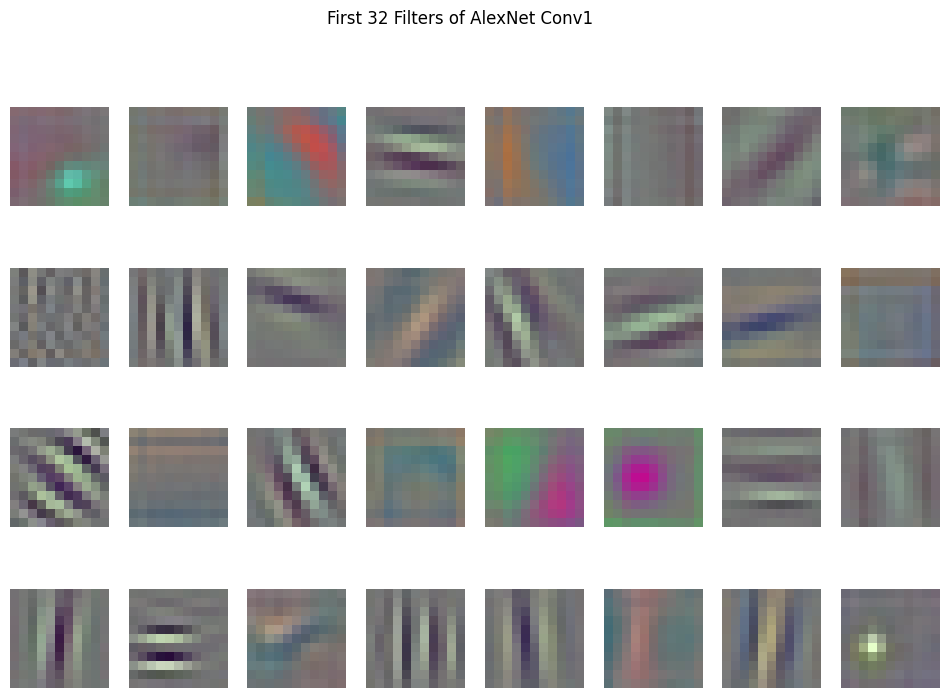

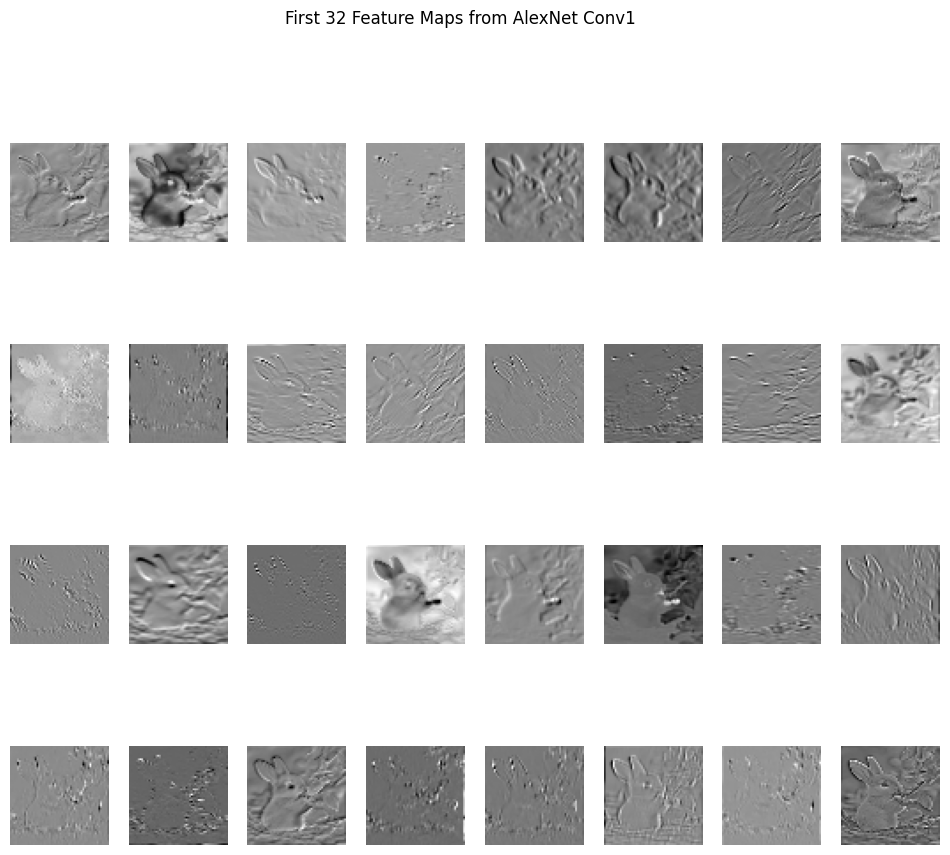

In [10]:
# Q8. Write a program to visualize the filters and feature maps of the first convolutional layer of AlexNet on an example input image.

import torch
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Load pretrained AlexNet & First convolutional layer
alexnet = models.alexnet(weights=models.AlexNet_Weights.IMAGENET1K_V1)
alexnet.eval()
conv1 = alexnet.features[0]

# Load and preprocess an image & Visualize Filters from Conv1
img_path = "animal.jpg"
img = Image.open(img_path).convert("RGB")

transform = transforms.Compose([
    transforms.Resize((227, 227)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

input_tensor = transform(img).unsqueeze(0)  # shape: [1,3,227,227]
filters = conv1.weight.data.clone()

# Normalize to [0,1] & Forward pass - Feature maps
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

plt.figure(figsize=(12, 8))
for i in range(32):  # Conv1 has 96 filters; display first 32
    plt.subplot(4, 8, i + 1)
    plt.imshow(filters[i].permute(1, 2, 0))
    plt.axis('off')
plt.suptitle("First 32 Filters of AlexNet Conv1")
plt.show()

with torch.no_grad():
    feature_maps = conv1(input_tensor)  # Output shape: [1, 96, H, W]

fm = feature_maps.squeeze()  # remove batch dim

# Visualize feature maps
plt.figure(figsize=(12,10))
for i in range(32):  # show first 32 feature maps
    plt.subplot(4, 8, i + 1)
    plt.imshow(fm[i].cpu(), cmap='gray')
    plt.axis('off')
plt.suptitle("First 32 Feature Maps from AlexNet Conv1") # Changed plt.subtitle to plt.suptitle
plt.show()

Using device: cuda


/usr/local/lib/python3.12/dist-packages/torchvision/models/googlenet.py:47: FutureWarning: The default weight initialization of GoogleNet will be changed in future releases of torchvision. If you wish to keep the old behavior (which leads to long initialization times due to scipy/scipy#11299), please set init_weights=True.
  warnings.warn(


Epoch 1/20 | Train Acc: 43.59% | Val Acc: 47.46%
Epoch 2/20 | Train Acc: 59.65% | Val Acc: 60.47%
Epoch 3/20 | Train Acc: 65.94% | Val Acc: 69.08%
Epoch 4/20 | Train Acc: 70.69% | Val Acc: 72.00%
Epoch 5/20 | Train Acc: 72.98% | Val Acc: 73.45%
Epoch 6/20 | Train Acc: 75.16% | Val Acc: 75.17%
Epoch 7/20 | Train Acc: 77.12% | Val Acc: 76.58%
Epoch 8/20 | Train Acc: 78.02% | Val Acc: 76.34%
Epoch 9/20 | Train Acc: 79.13% | Val Acc: 77.90%
Epoch 10/20 | Train Acc: 80.05% | Val Acc: 77.34%
Epoch 11/20 | Train Acc: 80.91% | Val Acc: 76.76%
Epoch 12/20 | Train Acc: 81.61% | Val Acc: 79.85%
Epoch 13/20 | Train Acc: 82.47% | Val Acc: 81.00%
Epoch 14/20 | Train Acc: 82.80% | Val Acc: 81.17%
Epoch 15/20 | Train Acc: 83.62% | Val Acc: 81.76%
Epoch 16/20 | Train Acc: 84.07% | Val Acc: 80.26%
Epoch 17/20 | Train Acc: 84.63% | Val Acc: 80.26%
Epoch 18/20 | Train Acc: 84.80% | Val Acc: 79.09%
Epoch 19/20 | Train Acc: 85.57% | Val Acc: 81.92%
Epoch 20/20 | Train Acc: 86.01% | Val Acc: 82.78%


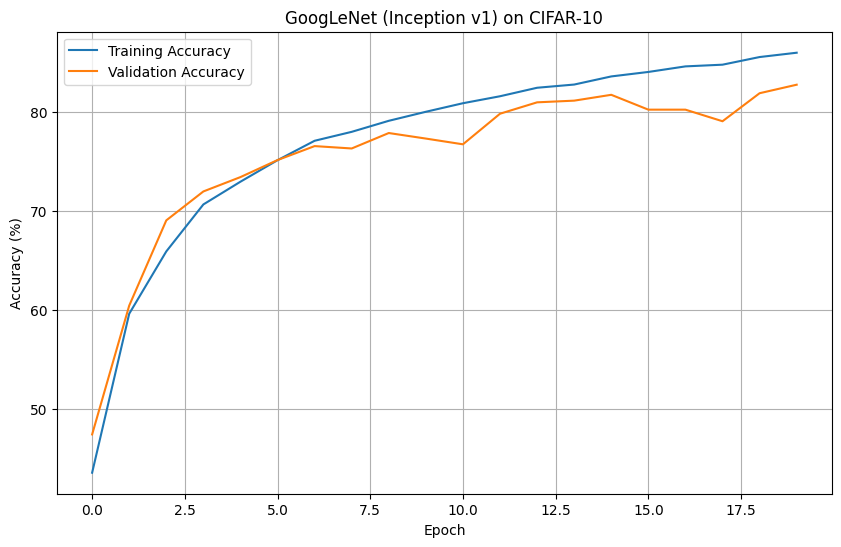

In [11]:
# Q9. Train a GoogLeNet (Inception v1) or its variant using a standard dataset like CIFAR-10.
# Plot the training and validation accuracy over epochs and analyze overfitting or underfitting.

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torchvision.models import googlenet, GoogLeNet_Weights

import matplotlib.pyplot as plt
import numpy as np

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# Data Loading: CIFAR-10
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465),
                         (0.247, 0.243, 0.261))
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465),
                         (0.247, 0.243, 0.261))
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform_train)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128,
                                          shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform_test)
testloader = torch.utils.data.DataLoader(testset, batch_size=128,
                                         shuffle=False, num_workers=2)

# Load GoogLeNet (Inception v1) & Training function
model = googlenet(weights=None, aux_logits=True, num_classes=10)
model = model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0003)

def train_one_epoch(epoch):
    model.train()
    correct = 0
    total = 0
    running_loss = 0

    for inputs, labels in trainloader:
       inputs, labels = inputs.to(device), labels.to(device)
       optimizer.zero_grad()

       outputs, aux1, aux2 = model(inputs)
       loss1 = criterion(outputs, labels)
       loss2 = criterion(aux1, labels)
       loss3 = criterion(aux2, labels)

       loss = loss1 + 0.3*(loss2 + loss3)  # auxiliary loss
       loss.backward()
       optimizer.step()

       running_loss += loss.item()

       _, predicted = outputs.max(1)
       total += labels.size(0)
       correct += predicted.eq(labels).sum().item()

    train_acc = 100 * correct / total
    train_loss = running_loss / len(trainloader)
    return train_acc, train_loss

# Validation function & Training Loop
def validate():
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in testloader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)

            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    val_acc = 100 * correct / total
    return val_acc

num_epochs = 20

train_acc_history = []
val_acc_history = []

for epoch in range(num_epochs):
    train_acc, train_loss = train_one_epoch(epoch)
    val_acc = validate()
    train_acc_history.append(train_acc)
    val_acc_history.append(val_acc)
    print(f"Epoch {epoch+1}/{num_epochs} | "
          f"Train Acc: {train_acc:.2f}% | Val Acc: {val_acc:.2f}%")

# Plot training vs validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(train_acc_history, label="Training Accuracy")
plt.plot(val_acc_history, label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.title("GoogLeNet (Inception v1) on CIFAR-10")
plt.legend()
plt.grid(True)
plt.show()